In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(R"C:\Users\ST\Downloads\Telco_Customer_Churn.csv")
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

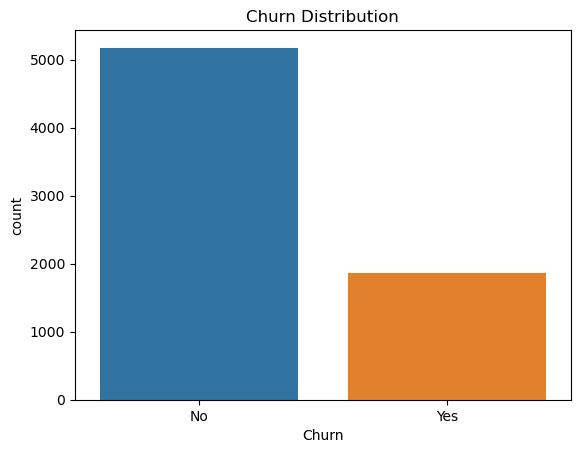

In [7]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


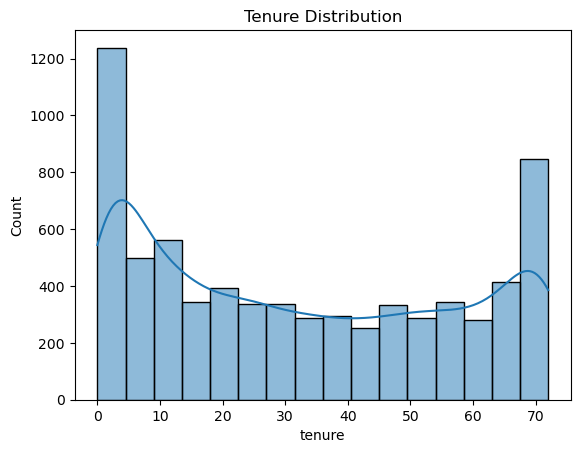

In [8]:
sns.histplot(df['tenure'], kde=True)
plt.title('Tenure Distribution')
plt.show()


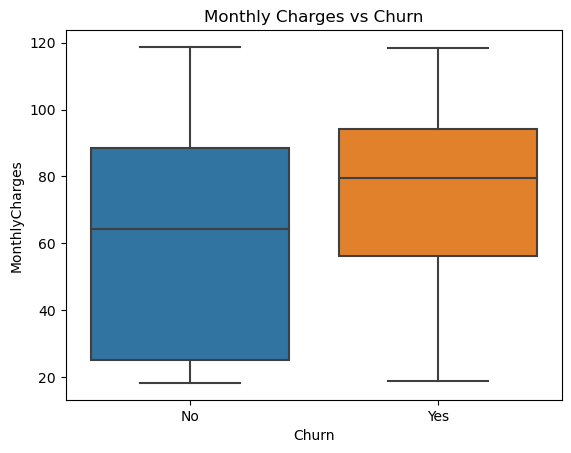

In [9]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: '7590-VHVEG'

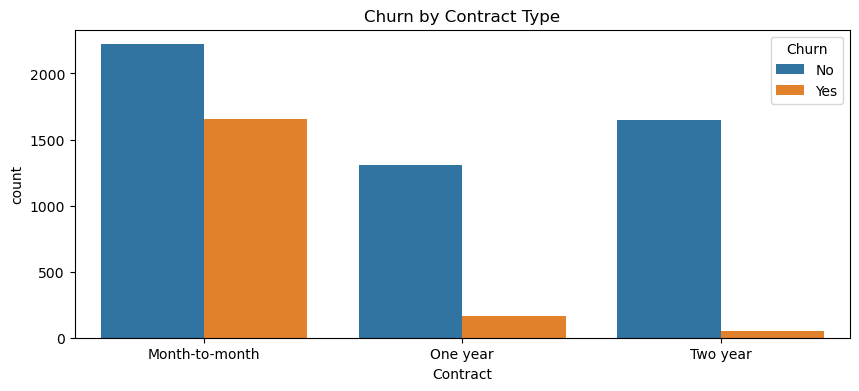

In [11]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()


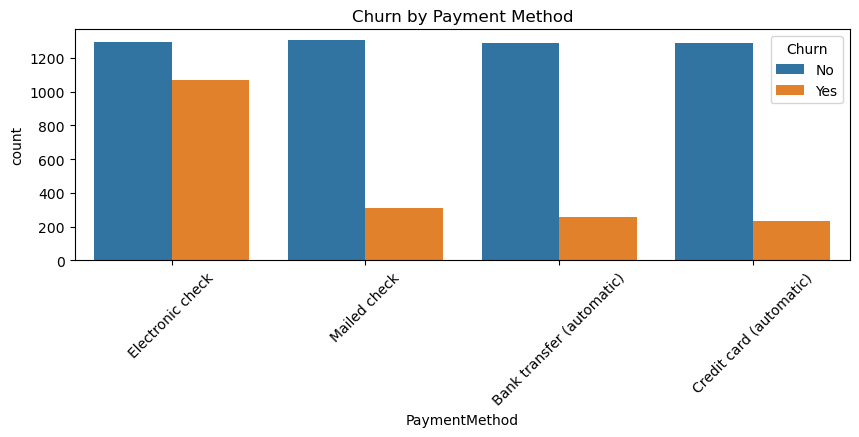

In [12]:
plt.figure(figsize=(10, 3))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.show()


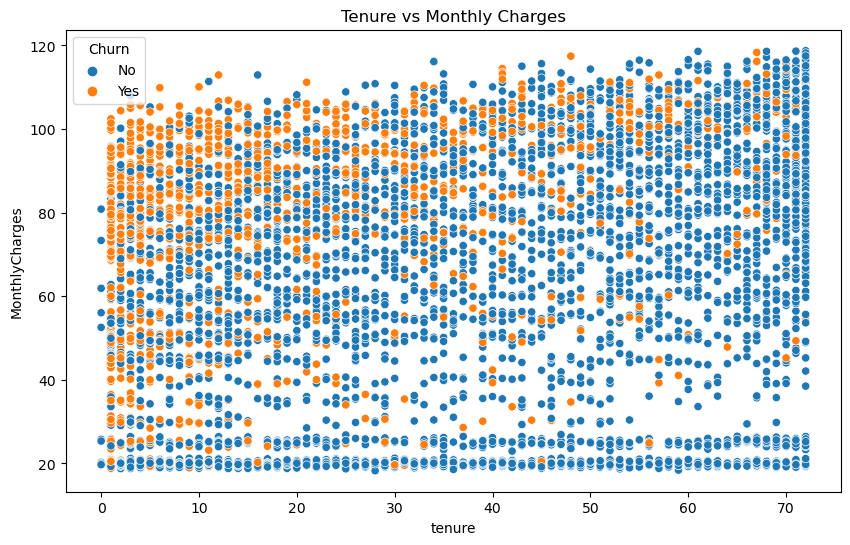

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Tenure vs Monthly Charges')
plt.show()


In [14]:
X = df[['tenure','InternetService','Contract', 'MonthlyCharges', 'TotalCharges']]
X["TotalCharges"] = X["TotalCharges"].replace(' ', 0)
X["TotalCharges"] = X["TotalCharges"].astype(float)
y = df["Churn"]

C:\Users\ST\AppData\Local\Temp\ipykernel_28484\3146692295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["TotalCharges"] = X["TotalCharges"].replace(' ', 0)
C:\Users\ST\AppData\Local\Temp\ipykernel_28484\3146692295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["TotalCharges"] = X["TotalCharges"].astype(float)


In [15]:
y = y.replace("Yes", 1).replace("No", 0)

In [16]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [17]:
X

,tenure,InternetService,Contract,MonthlyCharges,TotalCharges
0,1,DSL,Month-to-month,29.85,29.85
1,34,DSL,One year,56.95,1889.50
2,2,DSL,Month-to-month,53.85,108.15
3,45,DSL,One year,42.30,1840.75
4,2,Fiber optic,Month-to-month,70.70,151.65
...,...,...,...,...,...
7038,24,DSL,One year,84.80,1990.50
7039,72,Fiber optic,One year,103.20,7362.90
7040,11,DSL,Month-to-month,29.60,346.45
7041,4,Fiber optic,Month-to-month,74.40,306.60


In [18]:
X = pd.concat([X,pd.get_dummies(X["InternetService"])], axis =1)
X = pd.concat([X,pd.get_dummies(X["Contract"])], axis =1)
X

,tenure,InternetService,Contract,MonthlyCharges,TotalCharges,DSL,Fiber optic,No,Month-to-month,One year,Two year
0,1,DSL,Month-to-month,29.85,29.85,True,False,False,True,False,False
1,34,DSL,One year,56.95,1889.50,True,False,False,False,True,False
2,2,DSL,Month-to-month,53.85,108.15,True,False,False,True,False,False
3,45,DSL,One year,42.30,1840.75,True,False,False,False,True,False
4,2,Fiber optic,Month-to-month,70.70,151.65,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7038,24,DSL,One year,84.80,1990.50,True,False,False,False,True,False
7039,72,Fiber optic,One year,103.20,7362.90,False,True,False,False,True,False
7040,11,DSL,Month-to-month,29.60,346.45,True,False,False,True,False,False
7041,4,Fiber optic,Month-to-month,74.40,306.60,False,True,False,True,False,False


In [19]:
X.drop(["InternetService","Contract"], axis =1, inplace = True)

In [20]:
X

,tenure,MonthlyCharges,TotalCharges,DSL,Fiber optic,No,Month-to-month,One year,Two year
0,1,29.85,29.85,True,False,False,True,False,False
1,34,56.95,1889.50,True,False,False,False,True,False
2,2,53.85,108.15,True,False,False,True,False,False
3,45,42.30,1840.75,True,False,False,False,True,False
4,2,70.70,151.65,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,True,False,False,False,True,False
7039,72,103.20,7362.90,False,True,False,False,True,False
7040,11,29.60,346.45,True,False,False,True,False,False
7041,4,74.40,306.60,False,True,False,True,False,False


In [21]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
from sklearn import metrics

In [35]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[0 1 0 ... 0 0 0]
437     0
2280    0
2235    0
4460    0
3761    0
       ..
5143    0
4439    0
3857    0
4758    0
5613    0
Name: Churn, Length: 1409, dtype: int64


In [29]:
metrics.accuracy_score(y_test, y_pred)

0.7757274662881476

In [30]:
from joblib import dump, load

In [31]:
dump(model,"my_telco_trained_model.joblib")

['my_telco_trained_model.joblib']

In [32]:
model1 = load("my_telco_trained_model.joblib")

In [33]:
model1.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
model1.predict([X_test.iloc[2]])

C:\Users\ST\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)